In [1]:
from utils import SocketReader

In [2]:
try:
    sock.close()
except:
    pass

sock = SocketReader("www.google.com", 80, 'tcp')

sock.connect()

In [3]:
message = b"""GET / HTTP/1.1
Host: www.google.com

"""
sock.send(message)

In [4]:
sock.read_line()

b'HTTP/1.1 200 OK\r\n'

In [5]:
sock.read_line()

b'Date: Mon, 15 Feb 2021 07:23:07 GMT\r\n'

In [6]:
content_length = None
chunked = False

while True:
    header = sock.read_line()
    print(header)
    if header == b'\r\n':
        break
    if header.lower().startswith(b'content-length:'):
        content_length = int(i.split(':').strip())
        print('got content length', content_length)
    elif header.lower().startswith(b'transfer-encoding: chunked'):
        chunked = True
        print('got chunked')


b'Expires: -1\r\n'
b'Cache-Control: private, max-age=0\r\n'
b'Content-Type: text/html; charset=ISO-8859-1\r\n'
b'P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."\r\n'
b'Server: gws\r\n'
b'X-XSS-Protection: 0\r\n'
b'X-Frame-Options: SAMEORIGIN\r\n'
b'Set-Cookie: NID=209=fwC6F37yDFno66xdkp9awKq_V_GITIMnWI5u5vBg7s8RoPfp6juScUPrIMyBhW29UExOxXktRBfLnwPTPqNYgmIbWFNWazFxB-cnzu7bgNv8n0K-sJ_xLKeWkHxWA78asba4m98a36NVCsvD7uoGc02v9P3NkQosg7nx2BIjOr8; expires=Tue, 17-Aug-2021 07:23:07 GMT; path=/; domain=.google.com; HttpOnly\r\n'
b'Accept-Ranges: none\r\n'
b'Vary: Accept-Encoding\r\n'
b'Transfer-Encoding: chunked\r\n'
got chunked
b'\r\n'


In [7]:
body = b''

In [8]:
if chunked:
    print("reading chunks")
    length = sock.read_line()
    print("length line", length)
    l = int(length[:-2], 16)

reading chunks
length line b'570f\r\n'


In [9]:
if chunked:
    ch = sock.read_len(l)
    print("got chunk", len(ch), ch[:100])
    body += ch
    sock.read_line()

got chunk 22287 b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="nl"><head><meta content'


In [10]:
while chunked:
    print("reading chunks")
    length = sock.read_line()
    print("length line", length)
    l = int(length[:-2], 16)

    ch = sock.read_len(l)
    print("got chunk", len(ch), ch[:100])
    body += ch
    sock.read_line()
    if l == 0:
        break

reading chunks
length line b'c1\r\n'
got chunk 193 b'.google.com");G.m=F(G.m,"");G.l=F(G.l,[]);G.dpo=F(G.dpo,"");xa||w.push(["gl",{url:"//ssl.gstatic.com'
reading chunks
length line b'6604\r\n'
got chunk 26116 b'l=Ea;wa?Aa.load||p("load",Ba,Aa):p("load",Ba,Aa);p("dgl",Ba);p("agl",Da);h.o=xa};var Fa=h.b("0.1",.0'
reading chunks
length line b'0\r\n'
got chunk 0 b''


In [11]:
from IPython.core.display import display, HTML
display(HTML(body.decode("latin1")))

,,Geavanceerd zoeken


In [12]:
message = b"""GET /search?q=http+1.1 HTTP/1.1
Host: www.google.com

"""
sock.send(message)

In [13]:
sock.read_line()

b'HTTP/1.1 200 OK\r\n'

In [14]:
content_length = None
chunked = False

while True:
    header = sock.read_line()
    print(header)
    if header == b'\r\n':
        break
    if header.lower().startswith(b'content-length:'):
        content_length = int(i.split(':').strip())
        print('got content length', content_length)
    elif header.lower().startswith(b'transfer-encoding: chunked'):
        chunked = True
        print('got chunked')


b'Content-Type: text/html; charset=ISO-8859-1\r\n'
b'Date: Mon, 15 Feb 2021 07:25:54 GMT\r\n'
b'Expires: -1\r\n'
b'Cache-Control: private, max-age=0\r\n'
b'P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."\r\n'
b'Server: gws\r\n'
b'X-XSS-Protection: 0\r\n'
b'X-Frame-Options: SAMEORIGIN\r\n'
b'Set-Cookie: CGIC=; expires=Sat, 14-Aug-2021 07:25:54 GMT; path=/complete/search; domain=.google.com; HttpOnly\r\n'
b'Set-Cookie: CGIC=; expires=Sat, 14-Aug-2021 07:25:54 GMT; path=/search; domain=.google.com; HttpOnly\r\n'
b'Set-Cookie: NID=209=K_eqWLrYBnE_gl7KR-zI8iiV-95-50iF0z3eP8pjNWXN2Kv45JHFK3V6hhkMDzE_z9_ipjctGlgFl19LPDw_wYitpwsKC-SX92t2rkA5d89I5_2nU63O2sn3QiSh4KoDvutCUkInCVnmm4f9F6EwULg6pCn0aEqRehi4uTrwPeQ; expires=Tue, 17-Aug-2021 07:25:54 GMT; path=/; domain=.google.com; HttpOnly\r\n'
b'Accept-Ranges: none\r\n'
b'Vary: Accept-Encoding\r\n'
b'Transfer-Encoding: chunked\r\n'
got chunked
b'\r\n'


In [15]:
body = b''

In [16]:
while chunked:
    print("reading chunks")
    length = sock.read_line()
    print("length line", length)
    l = int(length[:-2], 16)

    ch = sock.read_len(l)
    print("got chunk", len(ch), ch[:100])
    body += ch
    sock.read_line()
    if l == 0:
        break

reading chunks
length line b'2f75\r\n'
got chunk 12149 b'<!doctype html><html lang="nl"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1'
reading chunks
length line b'131f\r\n'
got chunk 4895 b'<div id="main"><div><div class="KP7LCb"> <div class="bRsWnc"> <div class="N6RWV"> <div class="Pg70bf'
reading chunks
length line b'ec1\r\n'
got chunk 3777 b'(function(){\nvar a=document.getElementById("st-toggle"),b=document.getElementById("st-card");a&&b&&a'
reading chunks
length line b'63e1\r\n'
got chunk 25569 b'<div><!--SW_C_X--></div><div><div class="ZINbbc xpd O9g5cc uUPGi"><div class="kCrYT"><a href="/url?q'
reading chunks
length line b'53d3\r\n'
got chunk 21459 b'<script nonce="cmtTkoYG7zjhf3NhVB9kEg==">function _setImagesSrc(e,d){function f(b){b.onerror=functio'
reading chunks
length line b'2784\r\n'
got chunk 10116 b'JnSTMR8nSZrGZl0AkiqId3UXnh8n63rrd2MvxWhD5g7zPBhBCMPCIe3lQFMQbmYvDqgqh9agkVqjuCCtfM/oK8hwEcSYhiJELWPT'
reading chunks
length line b'0\r\n'
got chunk 0 


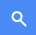
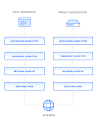
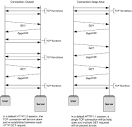
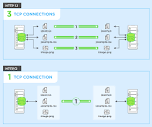

In [17]:
import re
from IPython.core.display import display, HTML
css_body_cleaner = re.compile(r'(<style>.*?)body\s*\{.+?\}(.*?</style>)')
display(HTML(re.sub(css_body_cleaner, r'\1\2', body.decode("latin1"))))

In [18]:
sock.close()